In [1]:
import torch

In [2]:
torch.__version__

'2.2.2+cpu'

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
x = torch.rand(5, 3).to(device)

In [5]:
x

tensor([[0.7790, 0.5503, 0.7008],
        [0.7641, 0.5842, 0.2652],
        [0.7902, 0.8440, 0.5741],
        [0.0492, 0.9503, 0.3049],
        [0.5618, 0.7087, 0.4558]])

# K-Means

In [6]:
import matplotlib.pyplot as plt

In [7]:
N = 100
x1 = torch.randn(N, 2)
x2 = torch.randn(N, 2) + torch.Tensor([3, 3])
x3 = torch.randn(N, 2) + torch.Tensor([-3, 3])

In [8]:
X = torch.cat([x1, x2, x3], dim=0)
print(X.shape)

torch.Size([300, 2])


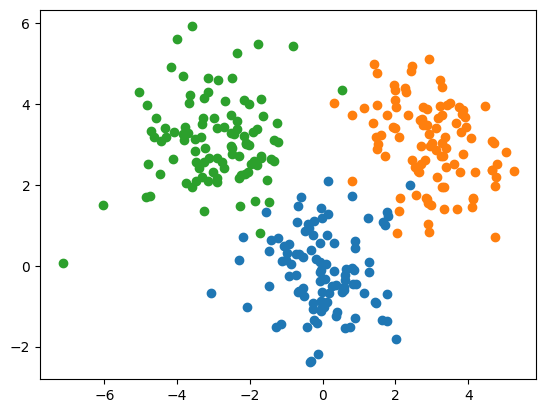

In [9]:
for i in range(3):
    plt.scatter(X[i*N:(i+1)*N, 0], X[i*N:(i+1)*N, 1])
plt.show()

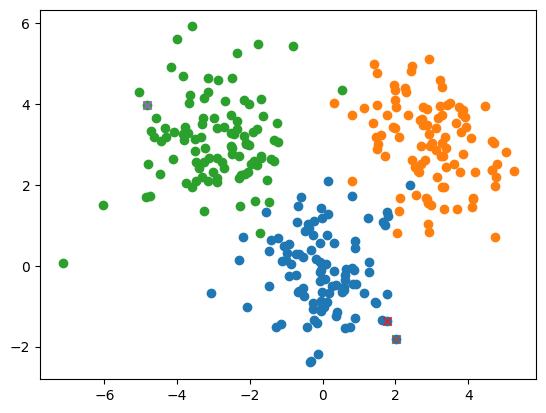

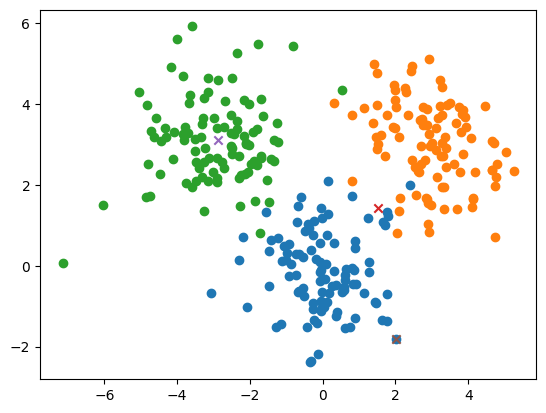

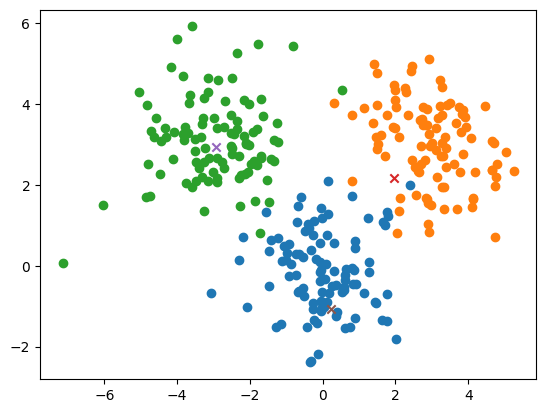

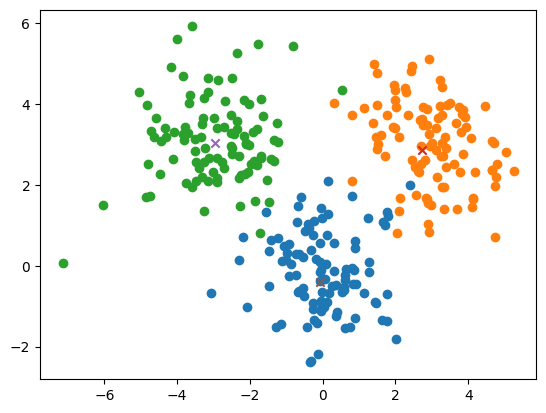

In [10]:
K = 3
centroids = X[torch.randperm(len(X))[:K]]
while True:
    D = torch.cdist(X, centroids)
    clusters = torch.argmin(D, dim=1)
    for i in range(3):
        plt.scatter(X[i*N:(i+1)*N, 0], X[i*N:(i+1)*N, 1])
    old_centroids = centroids.clone()
    for k in range(K):
        plt.scatter(centroids[k, 0], centroids[k, 1], marker='x')
        centroids[k] = X[clusters == k].mean(dim=0)
    change = torch.sum((centroids - old_centroids) ** 2)
    if change < 0.1:
        break
    plt.show()

# MLP

In [11]:
from torch import nn

In [12]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return self.fc3(x)

In [13]:
(1*32+32)+(32*16+16)+(16*1+1)

609

In [14]:
model = Regressor()

In [15]:
N = 1000
x = torch.rand(N, 1).to(device)
y = torch.sin(3 * x + 1) + 0.5 * torch.rand(N, 1).to(device)

In [17]:
device = 'cpu' 
model = model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()
for epoch in range(5000):
    y_ = model(x.to(device))
    loss = criterion(y_, y.to(device))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{epoch}: {loss.item()}')

0: 1.5790680646896362
100: 0.34628811478614807
200: 0.32474857568740845
300: 0.2749719023704529
400: 0.17657724022865295
500: 0.08414841443300247
600: 0.06042248383164406
700: 0.056890152394771576
800: 0.05502663552761078
900: 0.05352155119180679
1000: 0.05237560346722603
1100: 0.091207355260849
1200: 0.05003414303064346
1300: 0.04895542934536934
1400: 0.047999512404203415
1500: 0.04708525538444519
1600: 0.04620347172021866
1700: 0.04534797742962837
1800: 0.04451460763812065
1900: 0.04370059445500374
2000: 0.04290415346622467
2100: 0.0421241857111454
2200: 0.041360173374414444
2300: 0.040612030774354935
2400: 0.03987995907664299
2500: 0.039164479821920395
2600: 0.03846628591418266
2700: 0.03778619319200516
2800: 0.03712516278028488
2900: 0.03648418188095093
3000: 0.03586422652006149
3100: 0.035266268998384476
3200: 0.0346912182867527
3300: 0.03413986414670944
3400: 0.03361286222934723
3500: 0.03311072662472725
3600: 0.03263378143310547
3700: 0.03218219801783562
3800: 0.0317559093236923

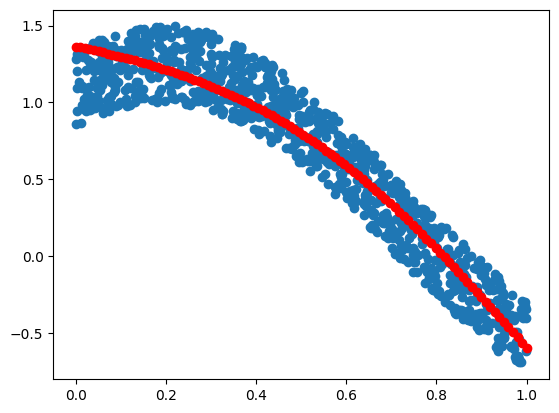

In [18]:
x_ = torch.linspace(0, 1, 100).reshape(-1, 1)
model.eval()
with torch.no_grad():
    y_ = model(x_.to(device))
plt.scatter(x, y)
plt.scatter(x_, y_.cpu(), color='r')
plt.show()

# Classification

In [102]:
N = 100
x1 = torch.randn(N, 2)
x2 = torch.randn(N, 2) + torch.Tensor([3, 3])
x3 = torch.randn(N, 2) + torch.Tensor([-3, 3])

In [104]:
X = torch.cat([x1, x2, x3], dim=0)

In [105]:
X.shape

torch.Size([300, 2])

In [106]:
Y = torch.cat([torch.zeros(N), torch.ones(N), 2*torch.ones(N)]).long()

In [107]:
Y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [110]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 3)
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return torch.sigmoid(self.fc3(x))

In [111]:
model = Classifier()

In [114]:
device = 'cpu' 
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()
for epoch in range(5000):
    y_ = model(X.to(device))
    loss = criterion(y_, Y.to(device))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{epoch}: {loss.item()}')

0: 0.5927306413650513
100: 0.5921318531036377
200: 0.591559648513794
300: 0.5910122394561768
400: 0.5904878973960876
500: 0.5899852514266968
600: 0.5895031094551086
700: 0.5890399813652039
800: 0.588594913482666
900: 0.5881668329238892
1000: 0.5877548456192017
1100: 0.5873581171035767
1200: 0.586975634098053
1300: 0.5866069197654724
1400: 0.5862509608268738
1500: 0.585907518863678
1600: 0.5855755805969238
1700: 0.5852548480033875
1800: 0.5849447250366211
1900: 0.584644615650177
2000: 0.5843542218208313
2100: 0.5840729475021362
2200: 0.5838004350662231
2300: 0.5835362672805786
2400: 0.5832801461219788
2500: 0.5830315947532654
2600: 0.5827904343605042
2700: 0.5825561285018921
2800: 0.5823286771774292
2900: 0.582107663154602
3000: 0.5818926095962524
3100: 0.5816835761070251
3200: 0.5814801454544067
3300: 0.5812820792198181
3400: 0.5810892581939697
3500: 0.5809014439582825
3600: 0.580718457698822
3700: 0.5805399417877197
3800: 0.5803660154342651
3900: 0.5801962018013
4000: 0.58003050088882

In [117]:
model.eval()
with torch.no_grad():
    y_ = model(X.to(device))
acc = torch.sum(Y == y_.argmax(dim=1).cpu())/len(Y)
print(acc.item())

0.9800000190734863


# Iris

In [152]:
from sklearn.datasets import load_iris
import numpy as np
df = load_iris(as_frame=True)

In [153]:
itrain = np.r_[0:25, 50:75, 100:125]
itest = np.r_[25:50, 75:100, 125:150]
xtrain = df['data'].iloc[itrain].values
xtest = df['data'].iloc[itest].values
ytrain = df['target'].iloc[itrain].values
ytest = df['target'].iloc[itest].values

In [154]:
xtrain.shape


(75, 4)

In [155]:
len(np.unique(ytrain))

3

In [156]:
# [4] 32 16 [3]
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 3)
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return torch.sigmoid(self.fc3(x))

In [157]:
xtrain_ = torch.tensor(xtrain, dtype=torch.float32)

In [158]:
xtest_ = torch.tensor(xtest, dtype=torch.float32)


In [159]:
xtrain_

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [160]:
ytrain

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [161]:
ytrain_ = torch.tensor(ytrain, dtype=torch.long)

In [162]:
ytest_ = torch.tensor(ytest, dtype=torch.long)


In [163]:
ytrain_

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2])

In [164]:
model = Classifier()

In [174]:
device = 'cpu' 
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

model.train()
for epoch in range(5000):
    y_ = model(xtrain_.to(device))
    loss = criterion(y_, ytrain_.to(device))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{epoch}: {loss.item()}')

0: 0.6569548845291138
100: 0.6569210886955261
200: 0.6568882465362549
300: 0.6568561792373657
400: 0.6568250060081482
500: 0.656794548034668
600: 0.6567649245262146
700: 0.6567360758781433
800: 0.6567078828811646
900: 0.6566805243492126
1000: 0.6566537618637085
1100: 0.6566275954246521
1200: 0.6566022038459778
1300: 0.6565772891044617
1400: 0.6565530896186829
1500: 0.6565293669700623
1600: 0.6565064191818237
1700: 0.6564838290214539
1800: 0.6564617156982422
1900: 0.656440258026123
2000: 0.6564192175865173
2100: 0.6563988327980042
2200: 0.6563787460327148
2300: 0.656359076499939
2400: 0.6563400030136108
2500: 0.6563212871551514
2600: 0.6563029885292053
2700: 0.6562851667404175
2800: 0.656267523765564
2900: 0.6562504172325134
3000: 0.6562337279319763
3100: 0.6562172770500183
3200: 0.6562013030052185
3300: 0.6561856269836426
3400: 0.6561701893806458
3500: 0.6561551690101624
3600: 0.6561403870582581
3700: 0.6561260223388672
3800: 0.6561118960380554
3900: 0.6560980081558228
4000: 0.65608441

In [175]:
model.eval()
with torch.no_grad():
    y_ = model(xtest_.to(device))
acc = torch.sum(ytest_ == y_.argmax(dim=1).cpu())/len(y_)
print(acc.item())

0.6666666865348816


# Tuning ใหม่

In [200]:
# [4] 128 64 [3]
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 3)
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return torch.sigmoid(self.fc3(x))

In [201]:
xtrain_ = torch.tensor(xtrain, dtype=torch.float32)

In [202]:
xtest_ = torch.tensor(xtest, dtype=torch.float32)

In [203]:
ytrain_ = torch.tensor(ytrain, dtype=torch.long)

In [204]:
ytest_ = torch.tensor(ytest, dtype=torch.long)

In [205]:
model = Classifier()

In [208]:
device = 'cpu' 
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model.train()
for epoch in range(5000):
    y_ = model(xtrain_.to(device))
    loss = criterion(y_, ytrain_.to(device))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{epoch}: {loss.item()}')

0: 1.0962764024734497
100: 1.095953106880188
200: 1.0956555604934692
300: 1.0953670740127563
400: 1.0950790643692017
500: 1.094787359237671
600: 1.094489574432373
700: 1.0941839218139648
800: 1.0938698053359985
900: 1.093545913696289
1000: 1.0932114124298096
1100: 1.0928653478622437
1200: 1.0925068855285645
1300: 1.092134952545166
1400: 1.091748595237732
1500: 1.0913467407226562
1600: 1.0909281969070435
1700: 1.090491771697998
1800: 1.090036392211914
1900: 1.0895603895187378
2000: 1.0890625715255737
2100: 1.0885411500930786
2200: 1.0879948139190674
2300: 1.0874215364456177
2400: 1.0868196487426758
2500: 1.0861871242523193
2600: 1.085521936416626
2700: 1.0848218202590942
2800: 1.084084153175354
2900: 1.083306908607483
3000: 1.0824871063232422
3100: 1.081621766090393
3200: 1.0807081460952759
3300: 1.0797425508499146
3400: 1.0787220001220703
3500: 1.0776422023773193
3600: 1.0764997005462646
3700: 1.0752899646759033
3800: 1.074008822441101
3900: 1.0726511478424072
4000: 1.0712120532989502


In [209]:
model.eval()
with torch.no_grad():
    y_ = model(xtest_.to(device))
acc = torch.sum(ytest_ == y_.argmax(dim=1).cpu())/len(y_)
print(acc.item())

0.6800000071525574
